In [1]:
from infrastructure.dataclasses import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="banana",
    dataset_number_of_points=1000,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="entropic_optimal_transport_quantile_regression",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=8,
        number_of_hidden_layers=4,
        epsilon=1e-7,
        number_of_samples_for_entropy_dual_estimation=2048,
        activation_function_name="Softplus"
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=10,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
_ = model.eval()

Epoch: 10, Objective: 3.625, LR: 0.000000: 100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


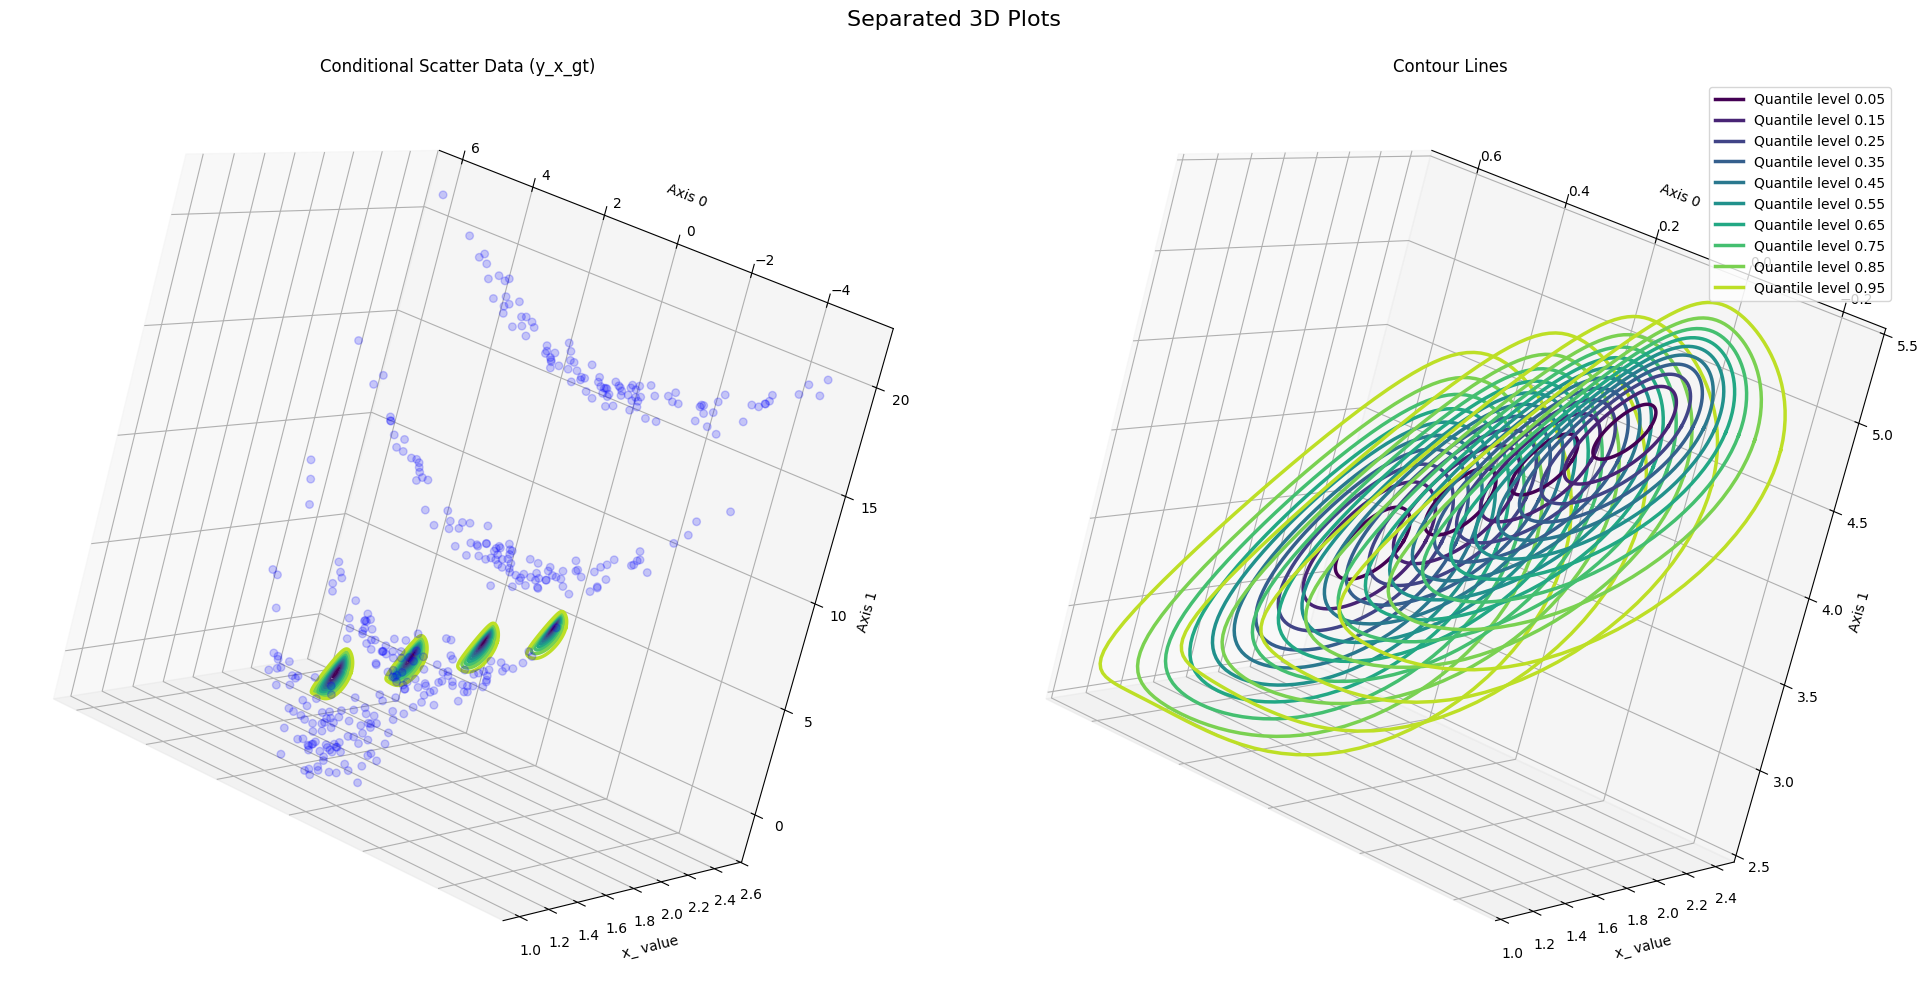

In [2]:
%matplotlib inline
from utils.plot import plot_potentials_from_banana_dataset

plot_potentials_from_banana_dataset(model=model, number_of_conditional_points=4, number_of_points_to_sample=100, tensor_parameters=experiment.tensor_parameters)

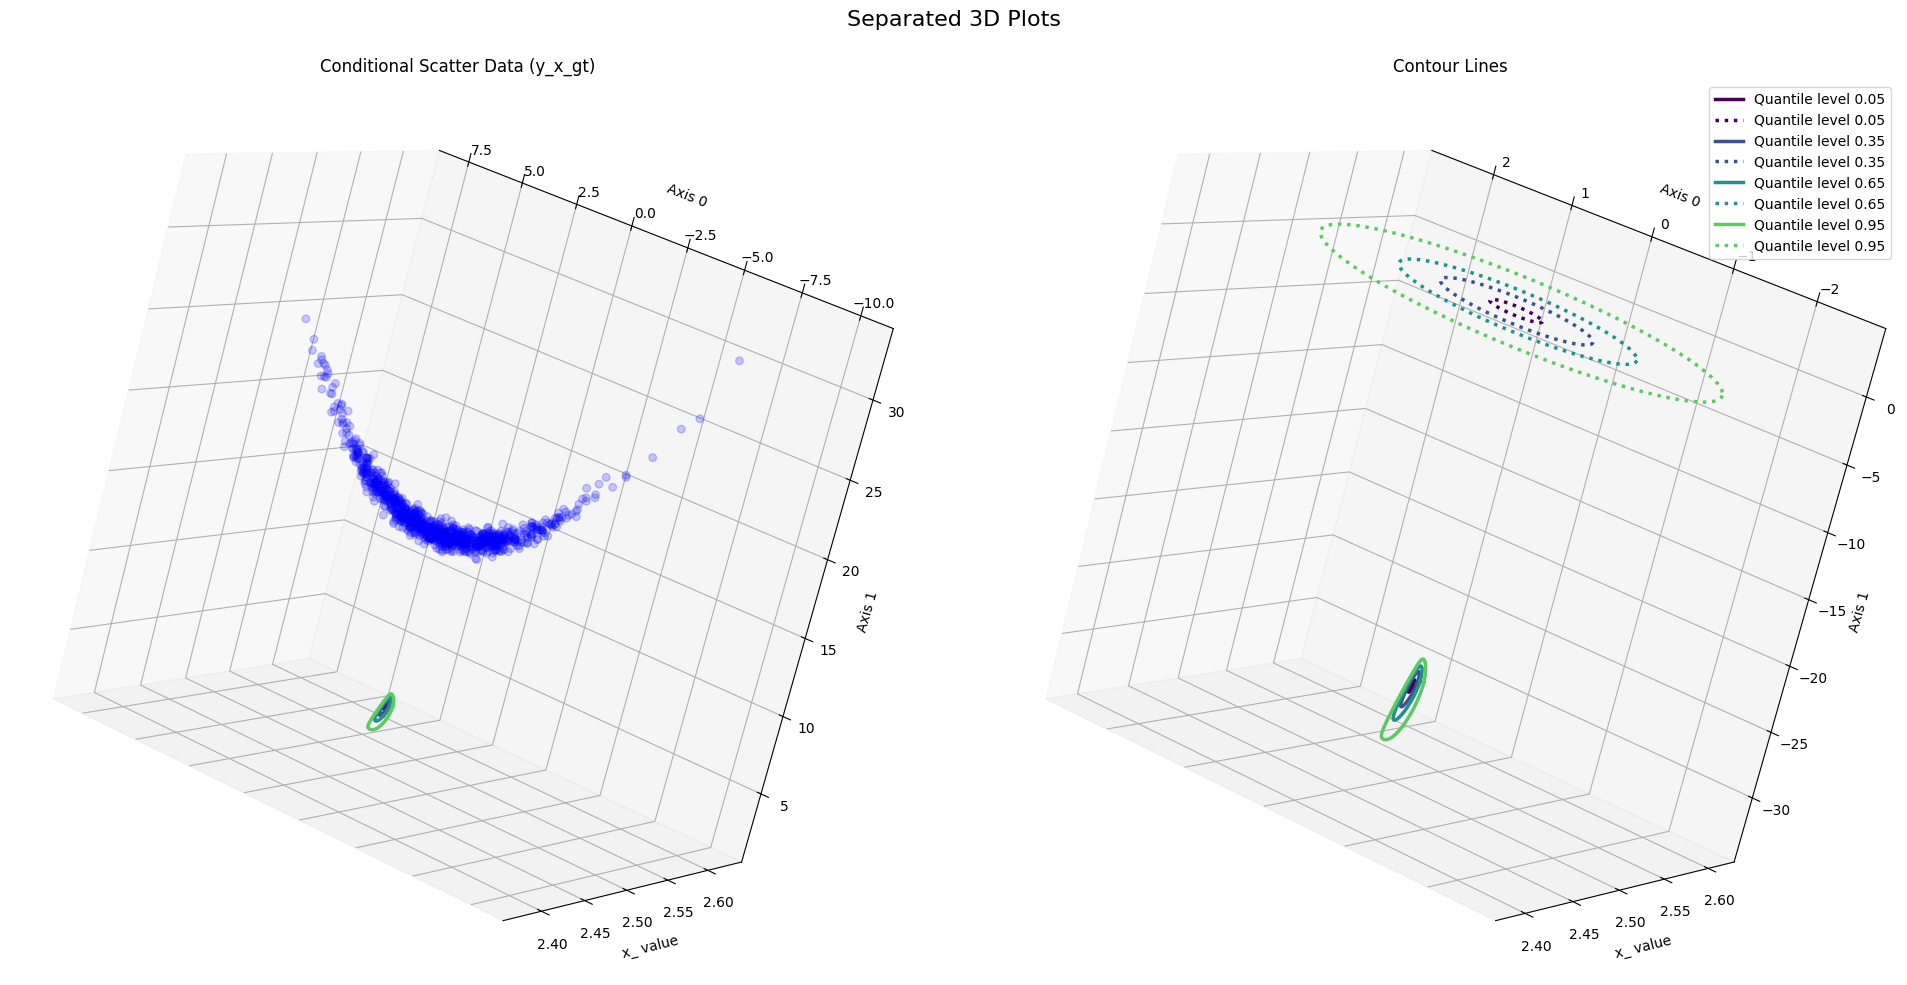

In [3]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_banana_dataset

plot_quantile_levels_from_banana_dataset(
    model=model,
    number_of_points_to_sample=1000,
    tensor_parameters=experiment.tensor_parameters,
    conditional_value=2.5,
    number_of_quantile_levels=4
)